<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [24]:
# input_shape = 13
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [25]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

boston_model = Sequential()
boston_model.add(Dense(64, input_shape=(13,), activation='relu'))
boston_model.add(Dense(64, activation='relu'))
# Don't use activation function on last layer because we don't want it to be bound
boston_model.add(Dense(1))
boston_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [32]:
boston_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [33]:
boston_model.fit(x_train, y_train,
 batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=True)

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 519us/step - loss: 588.4854 - mse: 588.4854 - val_loss: 610.5839 - val_mse: 610.5839
Epoch 2/50
404/404 [==============================] - 0s 20us/step - loss: 576.4037 - mse: 576.4037 - val_loss: 598.4999 - val_mse: 598.4998
Epoch 3/50
404/404 [==============================] - 0s 23us/step - loss: 564.6424 - mse: 564.6424 - val_loss: 586.3249 - val_mse: 586.3249
Epoch 4/50
404/404 [==============================] - 0s 21us/step - loss: 552.6990 - mse: 552.6990 - val_loss: 573.5997 - val_mse: 573.5997
Epoch 5/50
404/404 [==============================] - 0s 24us/step - loss: 540.2160 - mse: 540.2160 - val_loss: 559.8668 - val_mse: 559.8667
Epoch 6/50
404/404 [==============================] - 0s 20us/step - loss: 526.4949 - mse: 526.4949 - val_loss: 544.4786 - val_mse: 544.4786
Epoch 7/50
404/404 [==============================] - 0s 25us/step - loss: 510.6022 - mse: 510.6021 - val_l

In [34]:
scores = boston_model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 831us/step


In [35]:
print('Mean Squared Error:', scores[1])

Mean Squared Error: 61.68441390991211


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [14]:
# load the data

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [16]:
batch_size = 128
num_classes = 10
epochs = 12

In [17]:
# one-hot encode the training and testing labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
# Transformed integer into a 10 element binary vector with a 1 for the index of the class value 
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [19]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# input_shape = (28, 28, 1)

# Convert integers to floats
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [20]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, InputLayer, Activation

In [32]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train,
 batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=False)

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)

In [36]:
# Print test accuracy
print('Test accuracy:', score[1])

Test accuracy: 0.8738


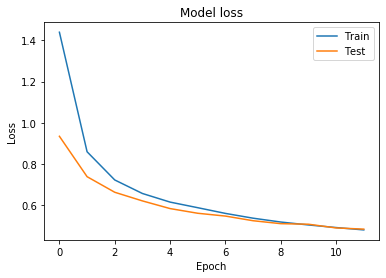

In [95]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [96]:
model.predict(X_test)

array([[6.32808678e-07, 1.07063023e-07, 5.39801817e-07, ...,
        3.02898347e-01, 4.41482151e-03, 5.45746863e-01],
       [8.58573243e-04, 1.93027226e-05, 7.24853516e-01, ...,
        1.22529354e-17, 2.10001279e-04, 1.28785207e-13],
       [9.07651520e-06, 9.99940991e-01, 4.61609915e-07, ...,
        2.28192021e-09, 6.72618794e-10, 2.45695356e-11],
       ...,
       [1.42443646e-02, 9.85847237e-06, 2.33460436e-04, ...,
        3.66189597e-05, 9.23373878e-01, 1.06076086e-05],
       [3.57072931e-05, 9.98607218e-01, 7.47139029e-06, ...,
        2.21488222e-07, 1.58172409e-08, 6.74480916e-09],
       [1.00880294e-04, 1.15082403e-04, 2.53981649e-04, ...,
        5.98839112e-02, 1.07124150e-02, 2.40203831e-03]], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.